In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch 
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('student_data.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.shape

(395, 33)

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

# preprocessing

Text(0.5, 1.0, 'Correlation Heatmap')

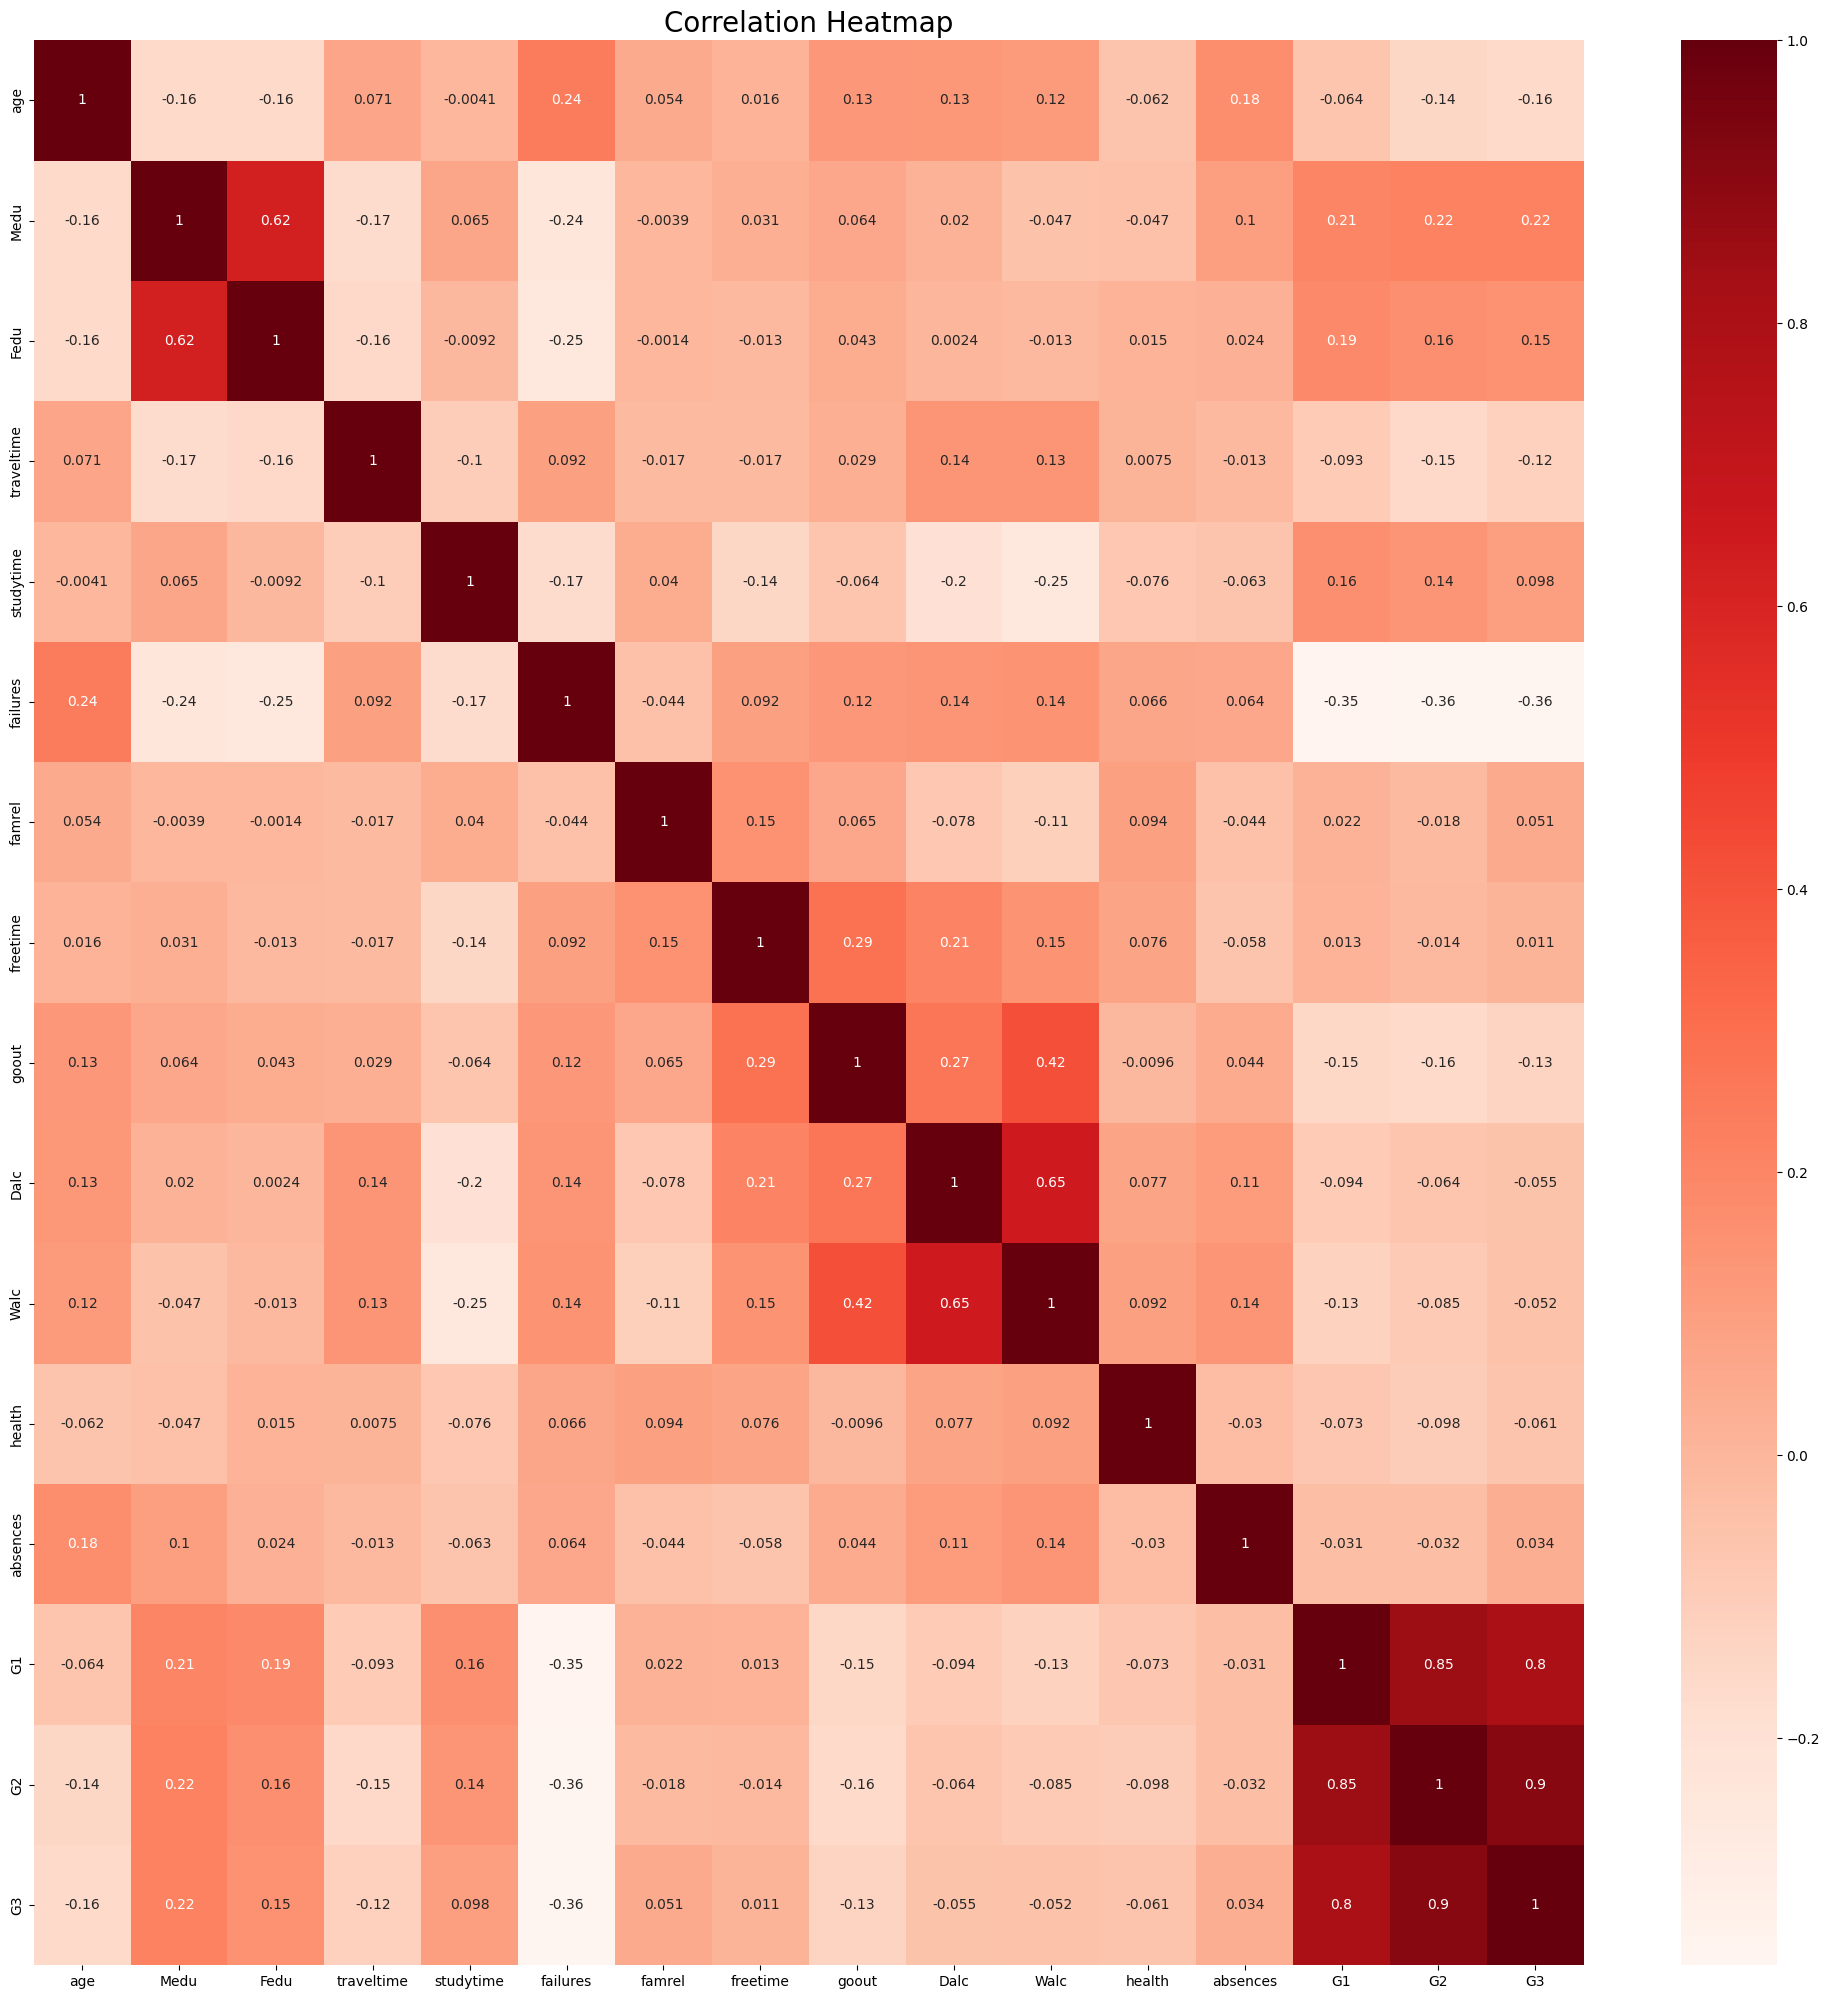

In [9]:
corr=df.corr(numeric_only=True)

plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
unique_counts = df.nunique()
print(unique_counts)

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64


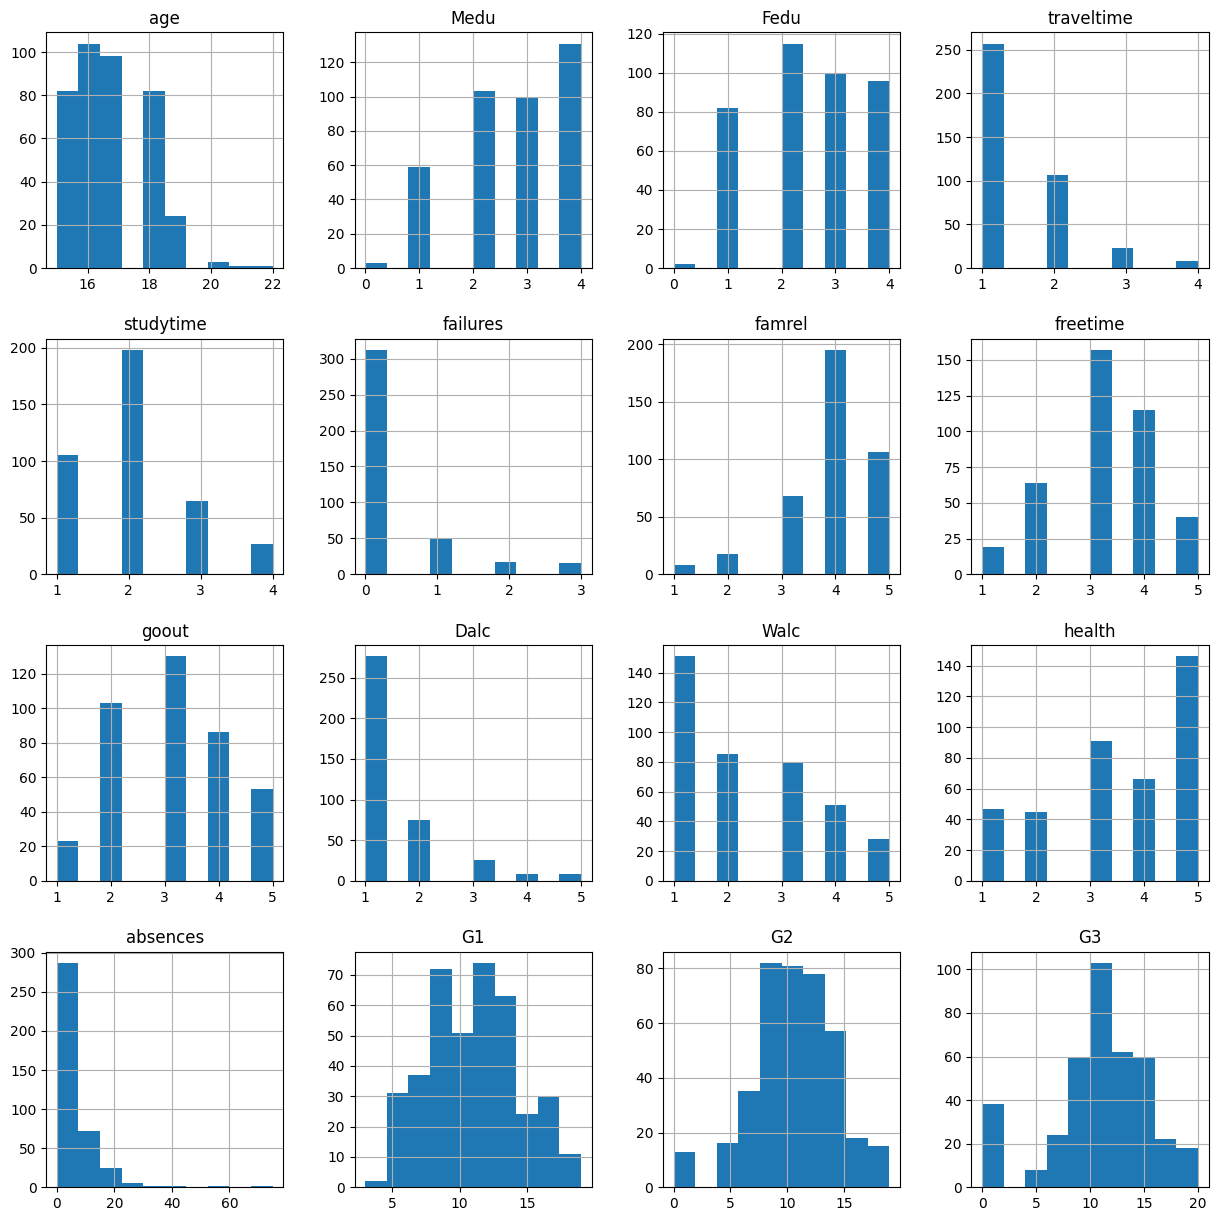

In [12]:
df.hist(figsize=(15, 15))
plt.show()

In [13]:
df['G2'].unique()

array([ 6,  5,  8, 14, 10, 15, 12, 18, 16, 13,  9, 11,  7, 19, 17,  4,  0],
      dtype=int64)

In [14]:
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'romantic']
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                  'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                  'G1', 'G2']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),  # 'passthrough' means no transformation
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

transformed_data = preprocessor.fit_transform(df)
encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
all_cols = numerical_cols + list(encoded_cols)
transformed_df = pd.DataFrame(transformed_data, columns=all_cols)

In [15]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                395 non-null    float64
 1   Medu               395 non-null    float64
 2   Fedu               395 non-null    float64
 3   traveltime         395 non-null    float64
 4   studytime          395 non-null    float64
 5   failures           395 non-null    float64
 6   famrel             395 non-null    float64
 7   freetime           395 non-null    float64
 8   goout              395 non-null    float64
 9   Dalc               395 non-null    float64
 10  Walc               395 non-null    float64
 11  health             395 non-null    float64
 12  absences           395 non-null    float64
 13  G1                 395 non-null    float64
 14  G2                 395 non-null    float64
 15  school_MS          395 non-null    float64
 16  sex_M              395 non

Split

In [16]:
X = transformed_df  
y = df['G3']  
train_ratio = 0.7  # Percentage of data for training
val_ratio = 0.1  # Percentage of data for validation
test_ratio = 0.2  # Percentage of data for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (276, 41)
y_train shape: (276,)
X_val shape: (40, 41)
y_val shape: (40,)
X_test shape: (79, 41)
y_test shape: (79,)


# Model

Epoch 1/600, Train Loss: 129.9440694615461, Val Loss: 131.6548035054267
Epoch 2/600, Train Loss: 124.7850206900334, Val Loss: 125.84517428241199
Epoch 3/600, Train Loss: 118.26793825453606, Val Loss: 118.04801911945584
Epoch 4/600, Train Loss: 109.77876779307489, Val Loss: 107.48016367079336
Epoch 5/600, Train Loss: 98.34767272506934, Val Loss: 93.82247181180158
Epoch 6/600, Train Loss: 83.65445366458616, Val Loss: 77.01628132107892
Epoch 7/600, Train Loss: 66.4301434945369, Val Loss: 57.87309820440751
Epoch 8/600, Train Loss: 47.74387752145961, Val Loss: 38.37991060184527
Epoch 9/600, Train Loss: 30.089337583901226, Val Loss: 22.305875126319595
Epoch 10/600, Train Loss: 16.618361569833063, Val Loss: 13.044603408137455
Epoch 11/600, Train Loss: 9.518643835316533, Val Loss: 9.83552202393737
Epoch 12/600, Train Loss: 7.407193501790364, Val Loss: 8.86777434771574
Epoch 13/600, Train Loss: 6.54286837923354, Val Loss: 7.981880924369715
Epoch 14/600, Train Loss: 5.739010479139245, Val Loss: 

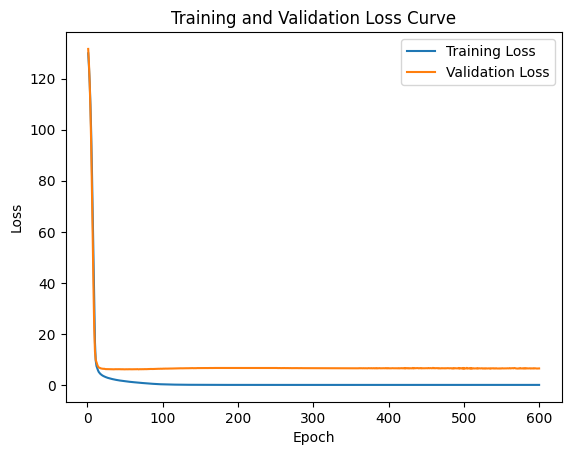

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to('cpu')
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to('cpu')
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to('cpu')
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to('cpu')

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class TabularRegressor(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )



        
    def forward(self, x):
        return self.model(x)

input_size = X_train.shape[1]  
clf = TabularRegressor(input_size).to('cpu')
loss_fn = nn.MSELoss()
weight_decay = 0.01  # Regularization strength
optimizer = Adam(clf.parameters(), lr=1e-3, weight_decay=weight_decay)  

# Training loop
num_epochs = 600
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    clf.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')

        optimizer.zero_grad()
        y_pred = clf(X_batch)
        loss = loss_fn(y_pred.squeeze(), y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    clf.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')

            y_pred = clf(X_batch)
            val_loss += loss_fn(y_pred.squeeze(), y_batch).item() * X_batch.size(0)

    avg_val_loss = val_loss / len(test_loader.dataset)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}")

# Plot the loss curve
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

In [18]:
transformed_df.shape

(395, 41)

In [19]:
clf.eval()
y_pred_list = []
y_true_list = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to('cpu'), y_batch.to('cpu')

        y_pred = clf(X_batch)

        y_pred_list.append(y_pred.cpu().numpy())
        y_true_list.append(y_batch.cpu().numpy())

y_pred_array = np.concatenate(y_pred_list)
y_true_array = np.concatenate(y_true_list)

mse = mean_squared_error(y_true_array, y_pred_array)
mae = mean_absolute_error(y_true_array, y_pred_array)
r2 = r2_score(y_true_array, y_pred_array)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 6.4622335
Mean Absolute Error (MAE): 1.8469205
R-squared: 0.6848467124223314
